In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numbers
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import *
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import chisquare
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# Section 01: Data Loading

In [2]:
bankChurn = pd.read_csv("bankChurn.csv", encoding='utf-8')
bankChurn.head()
# CHURN_CUST_IND - 1: Churned, 0: Not Churned  (Target Variable)

,CUST_ID,OPEN_ACC_DUR,AGE,GENDER_CD,HASNT_HOME_ADDRESS_INF,HASNT_MOBILE_TEL_NUM_INF,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_CUR_MON_AVG_BAL_PROP,LOCAL_CUR_ACCT_NUM,...,ATM_ALL_TX_NUM,COUNTER_NOT_ACCT_TX_NUM,COUNTER_ACCT_TX_AMT,COUNTER_ACCT_TX_NUM,COUNTER_ALL_TX_NUM,NAT_DEBT_OPEN_ACC_DUR,FINA_OPEN_ACC_DUR,FUND_OPEN_ACC_DUR,TELEBANK_ALL_TX_NUM,CHURN_CUST_IND
0,1,231,82,1,Y,N,0.000000,0.00,0.000000,0,...,0,0,12270,1,1,0,0,0,0,1
1,2,48,42,1,Y,N,1.005692,20149.04,0.264435,3,...,2,1,95024,6,7,0,0,0,0,1
2,3,102,31,2,Y,N,0.000562,17.81,1.000000,1,...,0,0,0,0,0,0,0,0,0,1
3,4,62,78,2,Y,N,-0.550912,29359.21,1.000000,1,...,1,0,0,0,0,0,0,0,0,1
4,5,79,46,1,Y,N,0.000288,34.68,1.000000,1,...,0,0,0,0,0,0,0,0,0,1


In [3]:
bankChurn.columns

Index(['CUST_ID', 'OPEN_ACC_DUR', 'AGE', 'GENDER_CD', 'HASNT_HOME_ADDRESS_INF',
       'HASNT_MOBILE_TEL_NUM_INF', 'LOCAL_CUR_SAV_SLOPE',
       'LOCAL_CUR_MON_AVG_BAL', 'LOCAL_CUR_MON_AVG_BAL_PROP',
       'LOCAL_CUR_ACCT_NUM', 'LOCAL_OVEONEYR_FF_MON_AVG_BAL',
       'LOCAL_FIX_MON_AVG_BAL', 'LOCAL_FIX_MON_AVG_BAL_PROP',
       'LOCAL_BELONEYR_FF_SLOPE', 'LOCAL_BELONEYR_FF_MON_AVG_BAL',
       'LOCAL_OVEONEYR_FF_SLOPE', 'LOCAL_SAV_SLOPE', 'LOCAL_SAV_CUR_ALL_BAL',
       'LOCAL_SAV_MON_AVG_BAL', 'SAV_SLOPE', 'SAV_CUR_ALL_BAL',
       'SAV_MON_AVG_BAL', 'FR_SAV_CUR_ALL_BAL', 'ASSET_CUR_ALL_BAL',
       'ASSET_MON_AVG_BAL', 'LOCAL_CUR_TRANS_TX_AMT', 'LOCAL_CUR_TRANS_TX_NUM',
       'LOCAL_CUR_LASTSAV_TX_AMT', 'LOCAL_CUR_LASTSAV_TX_NUM',
       'LOCAL_CUR_WITHDRAW_TX_AMT', 'LOCAL_CUR_WITHDRAW_TX_NUM',
       'LOCAL_FIX_OPEN_ACC_TX_NUM', 'LOCAL_FIX_OPEN_ACC_TX_AMT',
       'LOCAL_FIX_WITHDRAW_TX_NUM', 'LOCAL_FIX_WITHDRAW_TX_AMT',
       'LOCAL_FIX_CLOSE_ACC_TX_NUM', 'LOCAL_FIX_CLOSE_ACC_TX

In [4]:
bankChurn.describe()
# 17,241 rows with 1,741 churned customers, total churn rate is 10.1%

,CUST_ID,OPEN_ACC_DUR,AGE,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_CUR_MON_AVG_BAL_PROP,LOCAL_CUR_ACCT_NUM,LOCAL_OVEONEYR_FF_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL_PROP,...,ATM_ALL_TX_NUM,COUNTER_NOT_ACCT_TX_NUM,COUNTER_ACCT_TX_AMT,COUNTER_ACCT_TX_NUM,COUNTER_ALL_TX_NUM,NAT_DEBT_OPEN_ACC_DUR,FINA_OPEN_ACC_DUR,FUND_OPEN_ACC_DUR,TELEBANK_ALL_TX_NUM,CHURN_CUST_IND
count,17241.000000,17241.00000,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,1.724100e+04,1.724100e+04,17241.000000,...,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.0,17241.000000
mean,8621.000000,80.10475,49.339481,-0.011627,2.773542e+04,0.373216,1.796880,7.202392e+04,8.390765e+04,0.587804,...,0.597761,0.322313,3.272639e+04,1.303347,1.625660,-1262.148367,-1017.557914,-967.307001,0.0,0.100980
std,4977.192331,34.94432,15.431282,0.407344,9.860820e+04,0.438130,3.503054,1.289818e+05,3.602696e+05,0.443246,...,4.974549,0.870298,1.531975e+05,4.093381,4.560893,10929.030591,9825.499880,9583.391244,0.0,0.301311
min,1.000000,0.00000,4.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-95877.000000,-95877.000000,-95877.000000,0.0,0.000000
25%,4311.000000,56.00000,38.000000,-0.087996,5.153000e+01,0.005796,1.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,8621.000000,75.00000,47.000000,0.000000,3.232020e+03,0.091914,1.000000,5.000000e+04,5.667727e+04,0.854396,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,12931.000000,104.00000,59.000000,0.074506,2.311346e+04,1.000000,2.000000,9.500000e+04,1.011250e+05,0.990436,...,0.000000,0.000000,1.200000e+04,2.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,17241.000000,278.00000,110.000000,2.000000,7.610110e+06,1.000000,399.000000,5.561334e+06,4.358232e+07,1.000000,...,261.000000,24.000000,6.402993e+06,307.000000,331.000000,85.000000,24.000000,43.000000,0.0,1.000000


In [5]:
bankChurn.describe(include=np.object_)

,GENDER_CD,HASNT_HOME_ADDRESS_INF,HASNT_MOBILE_TEL_NUM_INF
count,17241,17241,17241
unique,3,2,2
top,2,Y,N
freq,8875,14765,11753


In [6]:
externalData = pd.read_csv("externalData.csv", encoding='utf-8')
externalData.head()

,CUST_ID,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,rev_Range,mou_Range,totmrc_Range,...,educ1,proptype,pcowner,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,car_buy
0,1,0.7425,0.00,0.000,0.000,0.0,0.000,2.97,741.0,0.00,...,2.0,NaN,Y,S,U,U,U,U,U,New
1,2,0.0000,255.25,76.575,76.575,0.0,0.195,122.16,889.0,0.00,...,NaN,NaN,NaN,N,U,U,U,U,U,New
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,A,Y,F,U,U,Y,U,U,New
3,4,7.1775,119.00,35.700,35.700,0.0,1.030,194.04,839.0,15.81,...,NaN,NaN,NaN,N,U,U,U,U,U,UNKNOWN
4,5,1.4850,121.50,36.450,36.450,0.0,0.000,170.63,1038.0,59.99,...,NaN,A,Y,U,U,U,U,U,Y,New


In [7]:
externalData.describe()

,CUST_ID,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,rev_Range,mou_Range,totmrc_Range,...,avg3rev,avg6qty,avg6mou,hnd_price,pre_hnd_price,lor,age1,age2,forgntvl,educ1
count,17241.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,...,17241.000000,16688.000000,16688.000000,17043.000000,7649.000000,12230.000000,16935.000000,16935.000000,16935.000000,2419.000000
mean,8621.000000,0.920998,39.815027,13.101876,12.848716,0.249300,1.142233,42.799289,369.560622,8.801175,...,60.086074,187.114334,531.920662,106.805692,82.761595,6.377514,31.669324,21.225037,0.058636,1.868541
std,4977.192331,2.118237,92.879658,29.493960,29.276031,2.132651,6.544958,70.035631,420.042160,27.175065,...,46.046675,195.036224,517.294774,61.622379,60.803160,4.781650,22.129690,23.903794,0.234949,0.847854
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,9.989998,9.989998,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4311.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.980000,116.000000,0.000000,...,34.000000,61.000000,173.000000,59.989990,29.989990,2.000000,0.000000,0.000000,0.000000,1.000000
50%,8621.000000,0.247500,2.750000,0.975000,0.600000,0.000000,0.000000,15.750000,242.000000,0.000000,...,49.000000,131.000000,374.000000,129.989990,59.989990,5.000000,36.000000,0.000000,0.000000,2.000000
75%,12931.000000,0.990000,41.000000,13.700000,13.275000,0.000000,0.257500,55.570000,468.000000,0.000000,...,72.000000,246.000000,726.250000,149.989990,129.989990,10.000000,48.000000,42.000000,0.000000,2.000000
max,17241.000000,57.667500,1887.250000,601.212500,601.212500,100.700000,416.257500,1527.970000,6865.000000,599.980000,...,835.000000,2673.000000,5347.000000,499.989990,499.989990,15.000000,96.000000,98.000000,1.000000,4.000000


In [8]:
externalData.describe(include=np.object_)

,crclscod,asl_flag,last_swap,dwlltype,marital,wrkwoman,proptype,pcowner,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,car_buy
count,17241,17241,7690,11952,16935,2230,4965,3232,16935,16935,16935,16935,16935,16935,16935
unique,47,2,980,2,5,1,6,1,17,2,2,2,2,2,2
top,AA,N,7/5/2001,S,U,Y,A,Y,N,U,U,U,U,U,UNKNOWN
freq,6287,14576,35,8595,6237,2230,4467,3232,5866,16269,16165,15500,15378,15277,9659


# Section 02: Exploratory Data Analysis (EDA)

In [9]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)  # Calculate the number of rows needed
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset[column].dtype == np.object_:  # If the data type is categorical
            sns.countplot(y=column, data=dataset, ax=ax)
            substrings = [s.get_text()[:18] for s in ax.get_yticklabels()]
            ax.set_yticklabels(substrings)
            plt.xticks(rotation=25)
        else:  # If the data type is numerical
            sns.histplot(dataset[column].dropna(), kde=True, ax=ax, edgecolor='black', linewidth=2)
            plt.xticks(rotation=25)

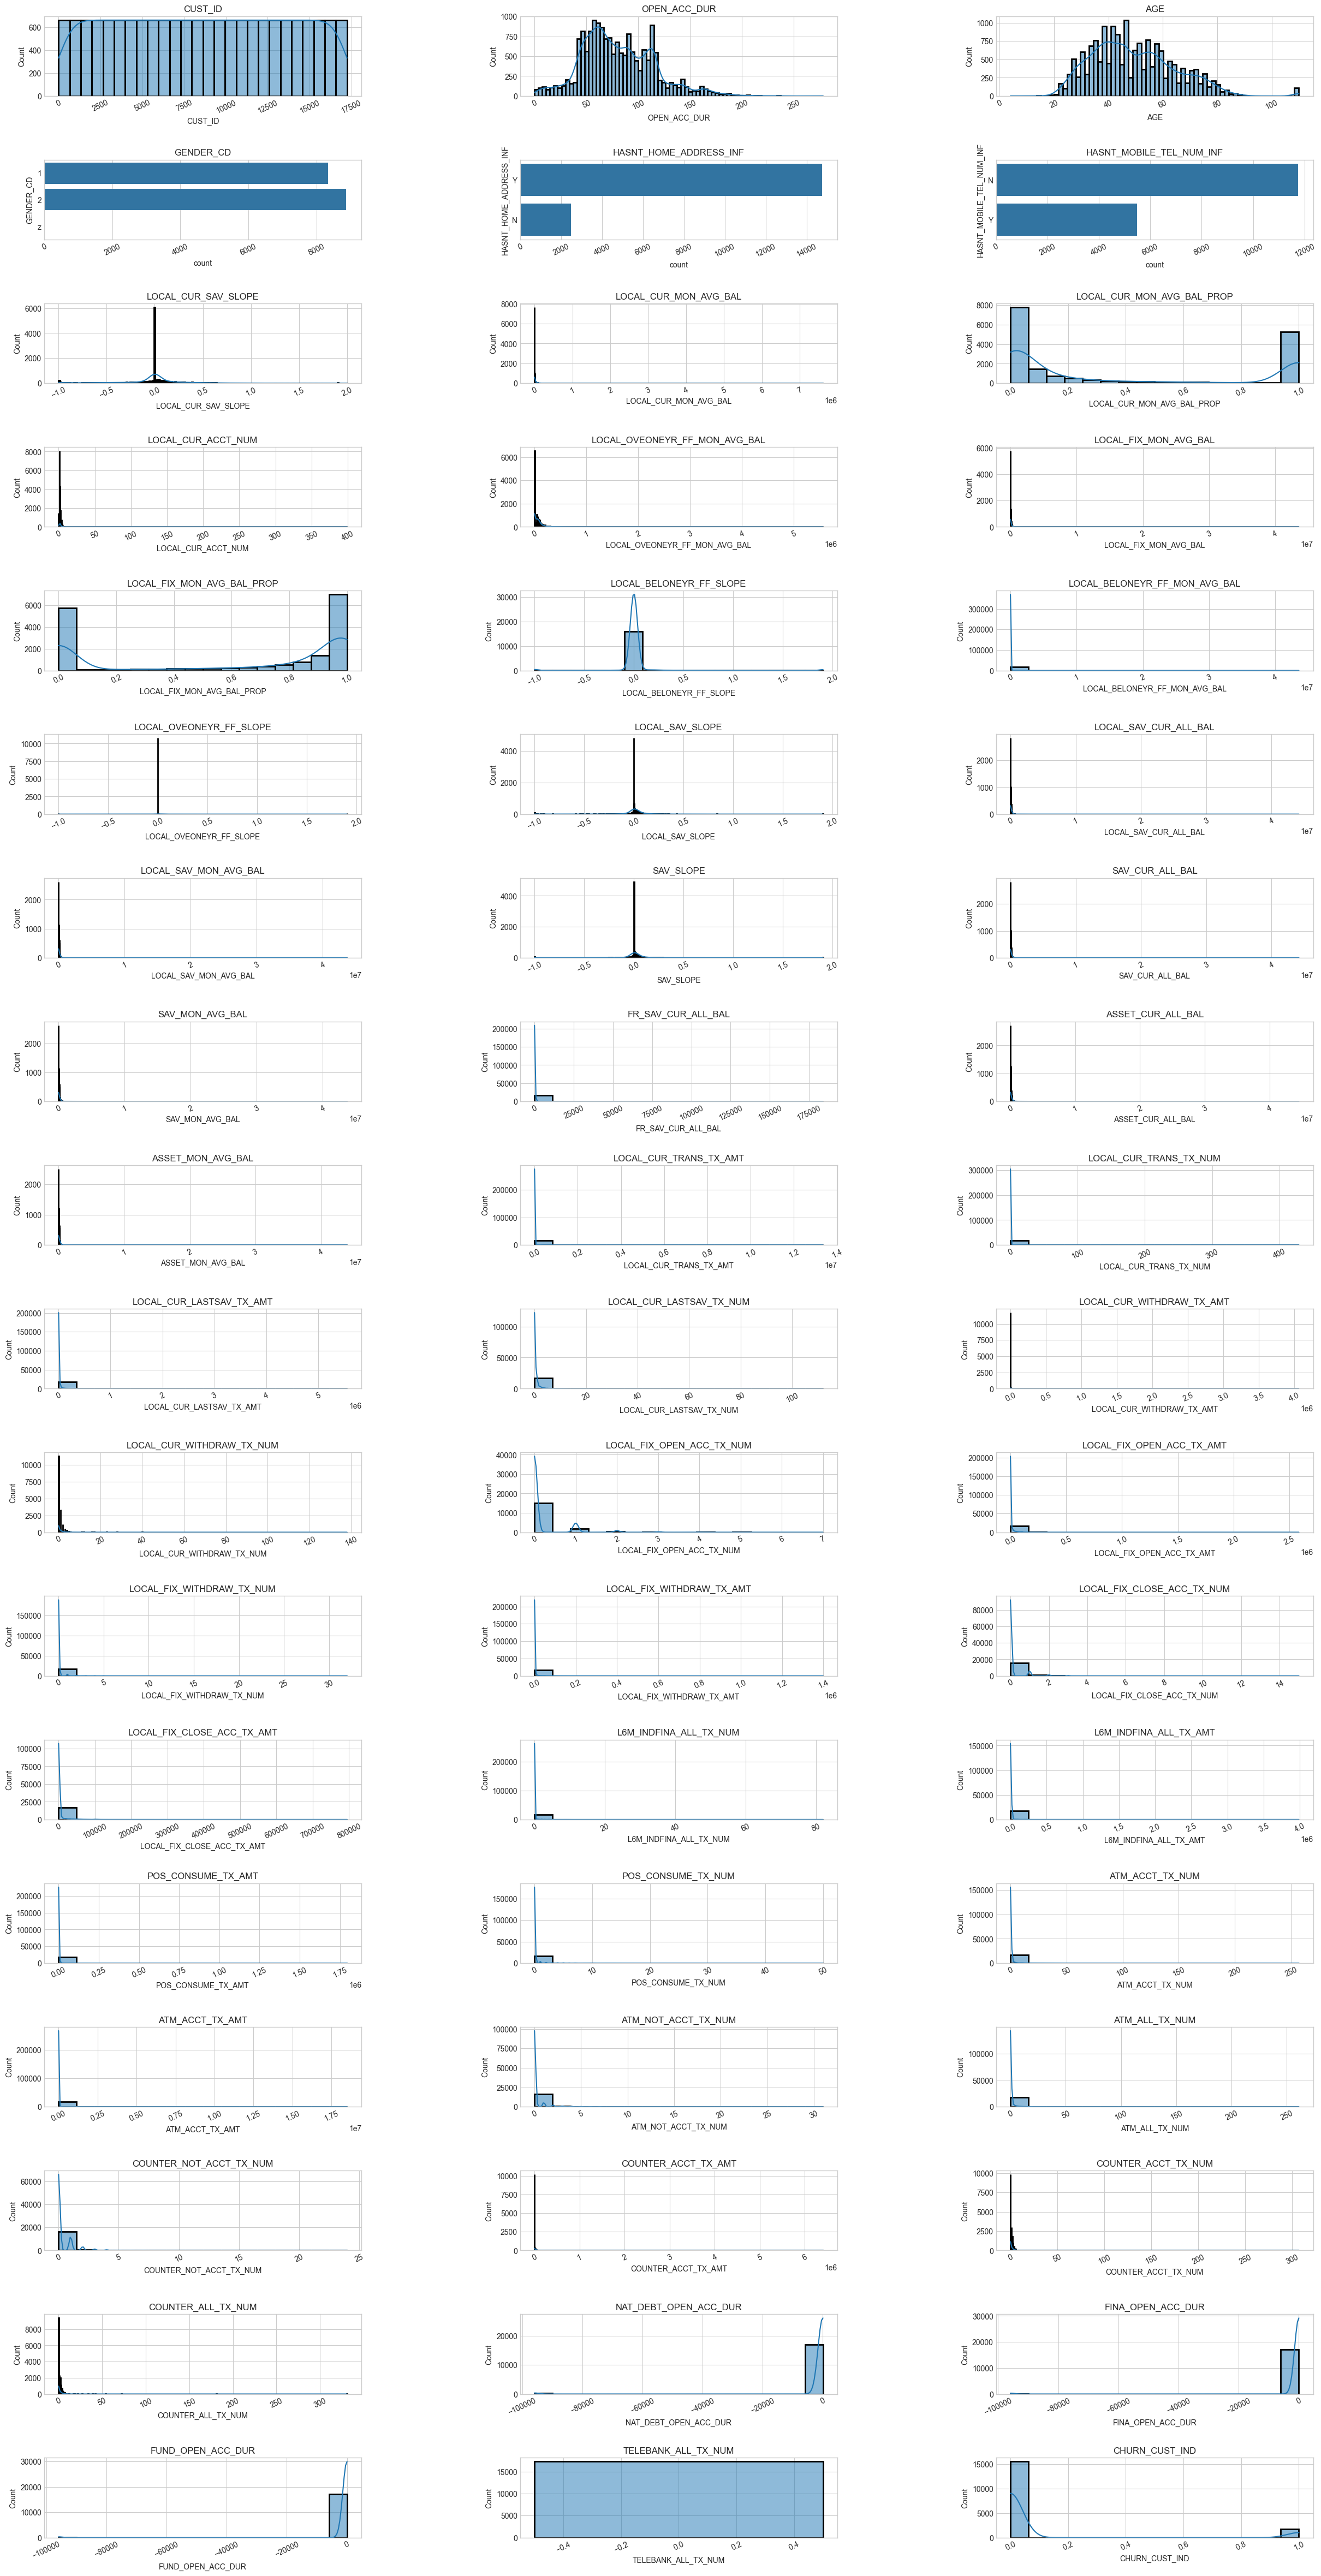

In [10]:
plot_distribution(bankChurn, cols=3, width=30, height=60, hspace=0.8, wspace=0.5)

In [11]:
def NumVarPerf(df, col, target, truncation=False): # Analyze the column's influence on the target variable
    validDf = df.loc[df[col].notna(), [col, target]] # Remove the missing values
    validRcd = validDf.shape[0]*1.0 / df.shape[0] # Calculate the proportion of valid records
    validRcdFmt = "{:.2%}".format(validRcd) # Format the proportion of valid records
    descStats = validDf[col].describe() # Get the descriptive statistics of the column
    mu = "{:.2f}".format(descStats["mean"]) # Format the mean
    std = "{:.2f}".format(descStats["std"]) # Format the standard deviation
    maxVal = "{:.2f}".format(descStats["max"]) # Format the maximum value
    minVal = "{:.2f}".format(descStats["min"]) # Format the minimum value
    x = validDf.loc[validDf[target] == 1][col] # Get the values of the column when the customer churns
    y = validDf.loc[validDf[target] == 0][col] # Get the values of the column when the customer doesn't churn
    xweights = 100.0 * np.ones_like(x) / len(x) # Set the weights of the churned customers
    yweights = 100.0 * np.ones_like(y) / len(y) # Set the weights of the retained customers
    if truncation:
        pcnt95 = np.percentile(validDf[col], 95) # Get the 95th percentile value
        x = x.map(lambda x: min(x, pcnt95)) # Truncate the extreme values of the churned customers
        y = y.map(lambda y: min(y, pcnt95)) # Truncate the extreme values of the retained customers
    fig, ax = plt.subplots()
    ax.hist(x, bins=30, weights=xweights, alpha=0.5, color='r', label='Attrition', edgecolor='black', linewidth=1.5)
    ax.hist(y, bins=30, weights=yweights, alpha=0.5, color='b', label='Retention', edgecolor='black', linewidth=1.5)
    titleText = "Histogram of " + col + "\n" + "Valid Records: " + validRcdFmt + "\n" + "Mean: " + mu + "\n" + "Std: " + std + "\n" + "Max: " + maxVal + "\n" + "Min: " + minVal
    ax.set_title(titleText)
    ax.margins(0.05)
    ax.set_ylim(bottom=0)
    plt.legend(loc='upper right')
    plt.show()

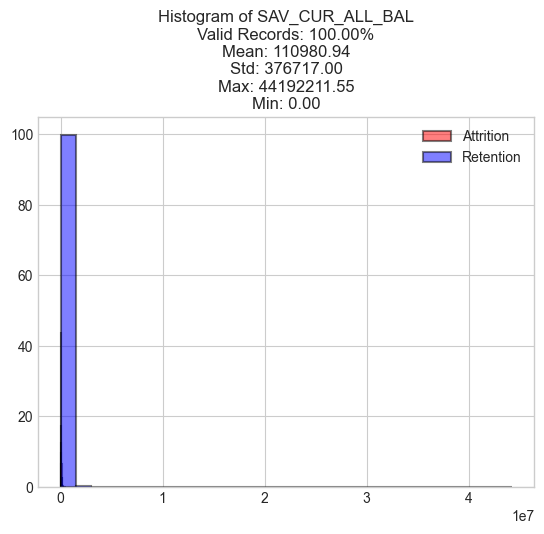

In [12]:
# SAV_CUR_ALL_BAL: Current Savings Account Balance
# Without truncation, the histogram cannot capiture the relationship between the target variable and the column
NumVarPerf(bankChurn, "SAV_CUR_ALL_BAL", "CHURN_CUST_IND", truncation=False)

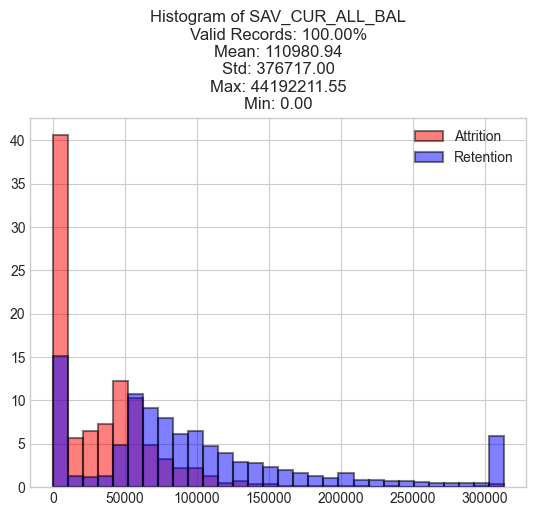

In [13]:
NumVarPerf(bankChurn, "SAV_CUR_ALL_BAL", "CHURN_CUST_IND", truncation=True)

**Above Analysis Conclusion:** With higher savings account balance, the churn rate is lower; with lower savings account balance, the churn rate is higher. 

In [14]:
def CharVarPerf(df, col, target):
    validDf = df.loc[df[col].notna(), [col, target]] # Remove the missing values
    validRcd = validDf.shape[0]*1.0 / df.shape[0] # Calculate the proportion of valid records
    recdNum = validDf.shape[0] # Get the number of valid records
    validRcdFmt = "{:.2%}".format(validRcd) # Format the proportion of valid records
    freqDict = {}
    churnRateDict = {}
    for level in validDf[col].unique():
        levelDf = validDf.loc[validDf[col] == level]
        freqDict[level] = levelDf.shape[0] * 1.0 / recdNum # Calculate the frequency of each level
        churnRateDict[level] = sum(levelDf[target]) * 1.0 / levelDf.shape[0] # Calculate the churn rate of each level
    descStats = pd.DataFrame({'percent': freqDict, 'churnRate': churnRateDict})
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    plt.title('The Frequency and Churn Rate of ' + col + '\n' + 'Valid Records: ' + validRcdFmt)
    descStats['churnRate'].plot(kind='line', color='red', ax=ax1) 
    descStats['percent'].plot(kind='bar', color='blue', ax=ax2, alpha=0.5)
    ax1.set_ylabel('Churn Rate')
    ax2.set_ylabel('Percentage')
    plt.show()

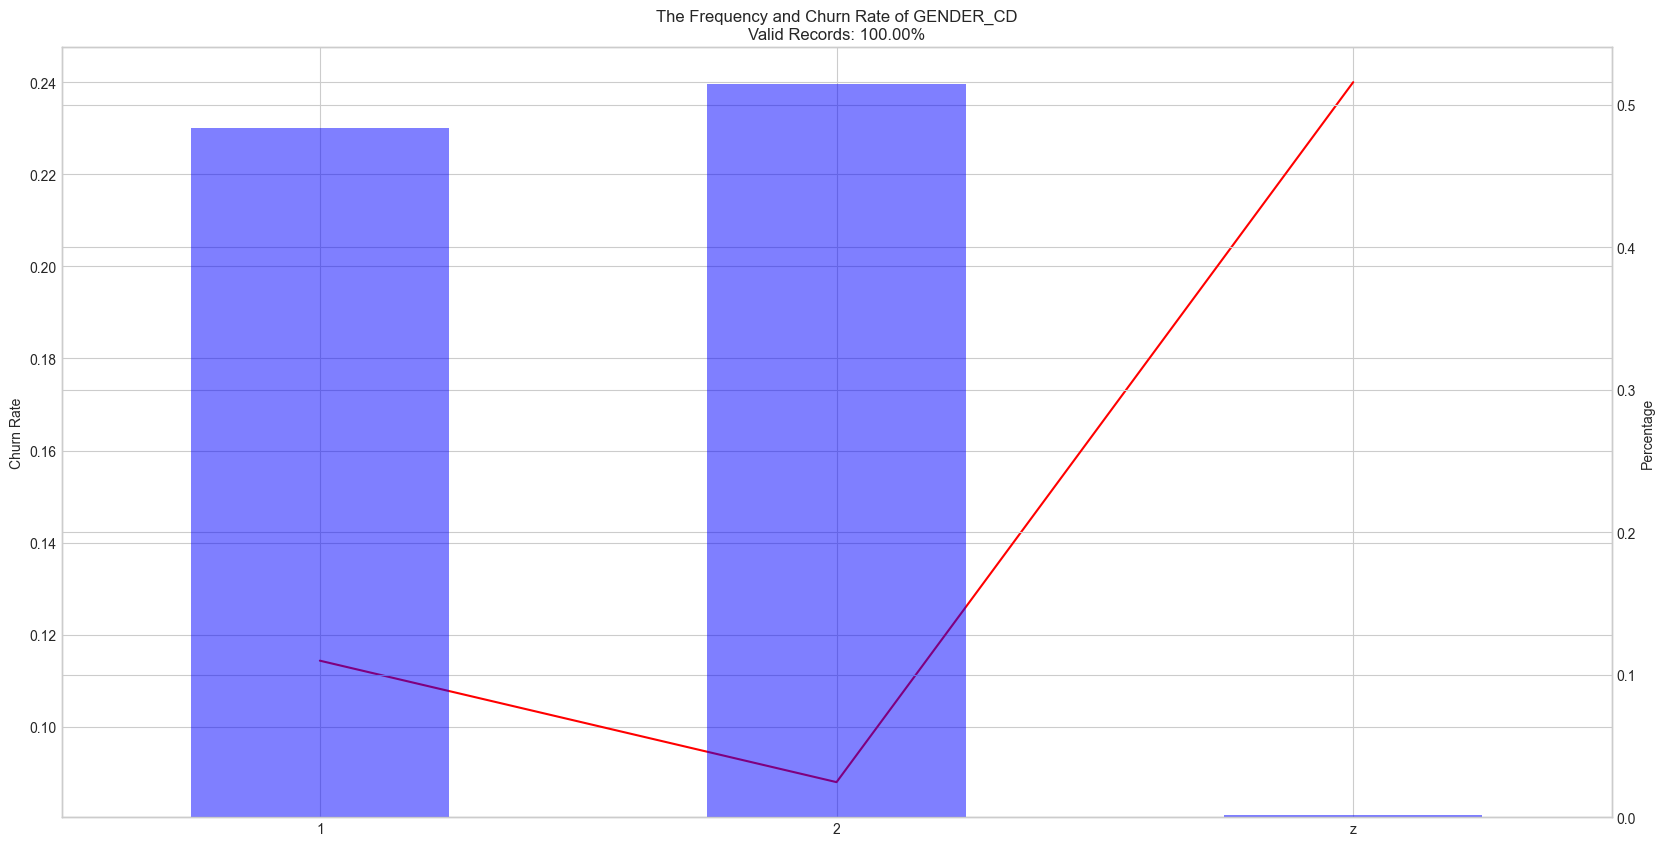

In [15]:
CharVarPerf(bankChurn, "GENDER_CD", "CHURN_CUST_IND")

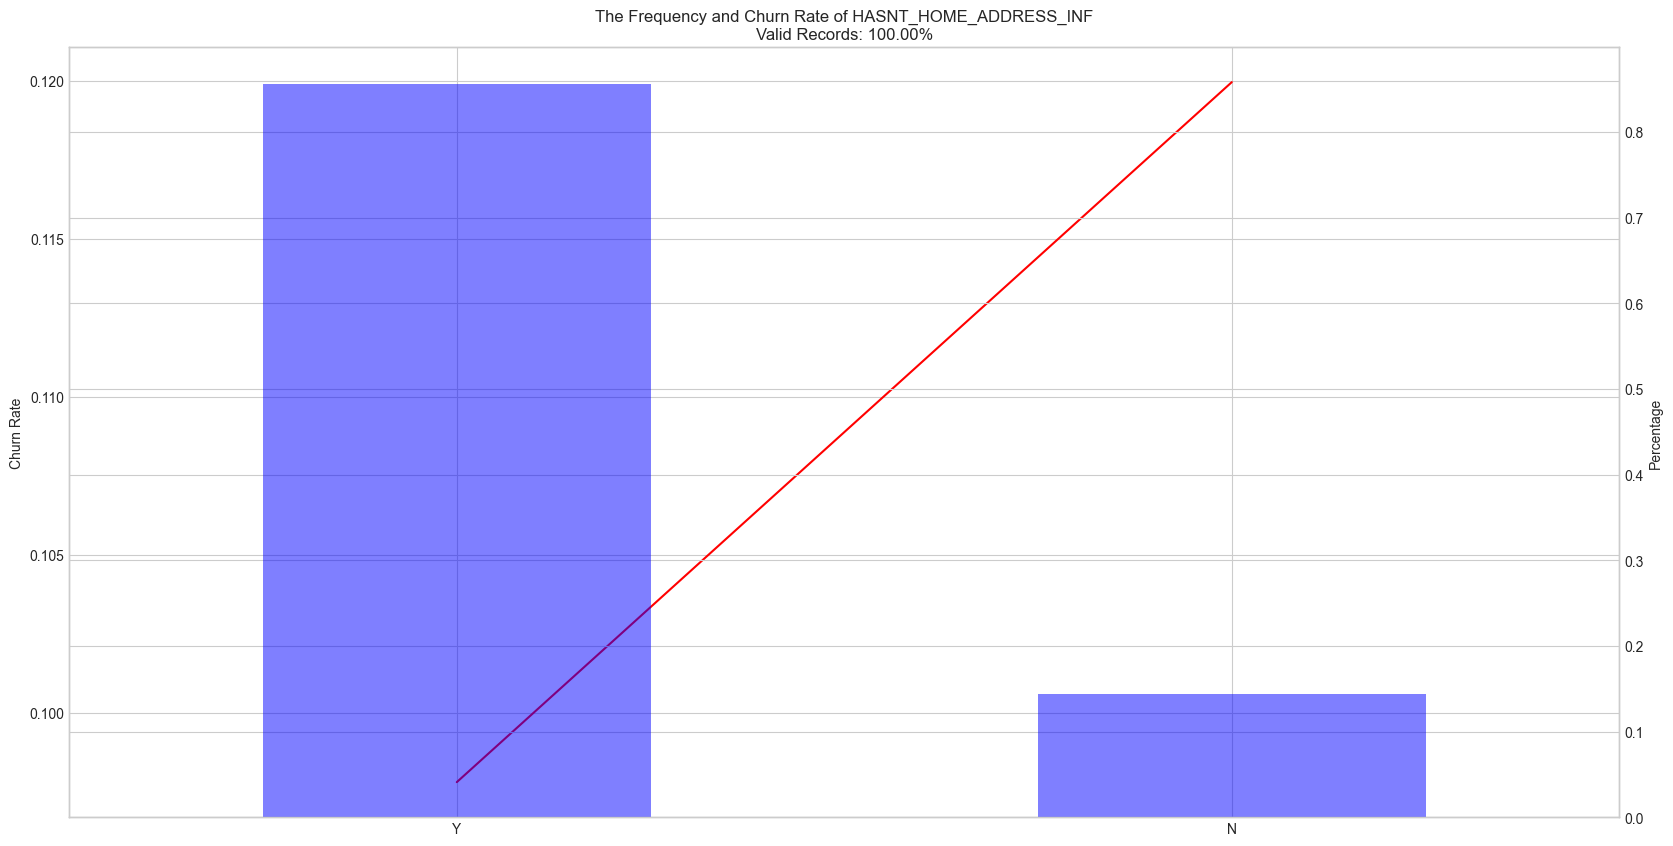

In [16]:
CharVarPerf(bankChurn, "HASNT_HOME_ADDRESS_INF", "CHURN_CUST_IND")

**Above Analysis Conclusion:** The churn rate of the customers without home address information is higher than that of the customers with home address information. 

# Section 04: Data Preprocessing

In [17]:
def MissingValuePreprocessing(df, col, types, method):
    validDf = df.loc[df[col].notna(), [col]] # get the valid records
    if validDf.shape[0] ==  df.shape[0]: # if there is no missing value
        return f"{col} has no missing value."
    
    missingList = [i for i in df[col]] 
    if types == "Continuous":
        if method not in ["Mean", "Random"]:
            return "The method is not supported."
        descStats = validDf[col].describe() # get the descriptive statistics of the column
        mu = descStats["mean"]
        std = descStats["std"]
        maxVal = descStats["max"]
        if maxVal > mu + 3 * std: # if there are extreme values
            for i in list(validDf.index):
                if validDf.loc[i, col] > mu + 3 * std:
                    validDf.loc[i, col] = mu + 3 * std  # truncate the extreme values
            
            mu = validDf[col].mean() # get the mean after truncation

        for i in list(df.index):
            if df.loc[i, col] != df.loc[i, col]: # if the value is missing
                if method == "Mean":
                    missingList[i] = mu
                elif method == "Random":
                    missingList[i] = random.sample(list(validDf[col]), 1)[0] # fill in the missing value with a random value 
    return missingList

In [18]:
def Encoder(df, col, target):
    encoder = {}
    for v in set(df[col]):
        if v == v: # if the value is not missing
            subDf = df[df[col] == v]
        else: 
            xList = list(df[col])
            nanInd = [i for i in range(len(xList)) if xList[i] != xList[i]]
            subDf = df.loc[nanInd] # get the records with missing values
        
        encoder[v] = sum(subDf[target] * 1.0) / subDf.shape[0] 
    newCol = [encoder[v] for v in df[col]]
    return newCol

In [19]:
def ColumnDivide(df, colNumerator, colDenominator):
    N = df.shape[0]
    rate = [0] * N
    xNum = list(df[colNumerator])
    xDen = list(df[colDenominator])
    for i in range(N):
        if xDen[i] > 0:
            rate[i] = xNum[i] * 1.0 / xDen[i]
        else:
            rate[i] = 0
    return rate

In [20]:
data = pd.merge(bankChurn, externalData, on='CUST_ID')
data.head()

,CUST_ID,OPEN_ACC_DUR,AGE,GENDER_CD,HASNT_HOME_ADDRESS_INF,HASNT_MOBILE_TEL_NUM_INF,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_CUR_MON_AVG_BAL_PROP,LOCAL_CUR_ACCT_NUM,...,educ1,proptype,pcowner,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,car_buy
0,1,231,82,1,Y,N,0.000000,0.00,0.000000,0,...,2.0,NaN,Y,S,U,U,U,U,U,New
1,2,48,42,1,Y,N,1.005692,20149.04,0.264435,3,...,NaN,NaN,NaN,N,U,U,U,U,U,New
2,3,102,31,2,Y,N,0.000562,17.81,1.000000,1,...,NaN,A,Y,F,U,U,Y,U,U,New
3,4,62,78,2,Y,N,-0.550912,29359.21,1.000000,1,...,NaN,NaN,NaN,N,U,U,U,U,U,UNKNOWN
4,5,79,46,1,Y,N,0.000288,34.68,1.000000,1,...,NaN,A,Y,U,U,U,U,U,Y,New


In [21]:
modelData = data.copy()
indepCols = list(modelData.columns)
indepCols.remove("CHURN_CUST_IND") # Remove the target variable
indepCols.remove("CUST_ID") # Remove the customer ID

except_var = []

for col in indepCols:
    try:
        x0 = list(set(modelData[col]))
        if col == "forgntvl": # process the column "forgntvl"
            x00 = [np.nan]
            [x00.append(x) for x in x0 if x not in x00 and x == x] # remove the duplicate values
            x0 = x00
        if len(x0) == 1: # if there is only one unique value
            print("Remove the constant column {0}".format(col))
            indepCols.remove(col)
            continue
        x = [i for i in x0 if i == i] # remove the missing values
        if isinstance(x[0], numbers.Real) and len(x) > 4:
            if np.nan in x0:
                print('nan is in the column {0}'.format(col))
                modelData[col] = MissingValuePreprocessing(modelData, col, "Continuous", "Random")
            else:
                print('Encode {0}'.format(col)) 
                modelData[col] = Encoder(modelData, col, "CHURN_CUST_IND")
    except:
        except_var.append(col)
        print("Error in column {0}".format(col))
        continue 

Encode OPEN_ACC_DUR
Encode AGE
Encode LOCAL_CUR_SAV_SLOPE
Encode LOCAL_CUR_MON_AVG_BAL
Encode LOCAL_CUR_MON_AVG_BAL_PROP
Encode LOCAL_CUR_ACCT_NUM
Encode LOCAL_OVEONEYR_FF_MON_AVG_BAL
Encode LOCAL_FIX_MON_AVG_BAL
Encode LOCAL_FIX_MON_AVG_BAL_PROP
Encode LOCAL_BELONEYR_FF_SLOPE
Encode LOCAL_BELONEYR_FF_MON_AVG_BAL
Encode LOCAL_OVEONEYR_FF_SLOPE
Encode LOCAL_SAV_SLOPE
Encode LOCAL_SAV_CUR_ALL_BAL
Encode LOCAL_SAV_MON_AVG_BAL
Encode SAV_SLOPE
Encode SAV_CUR_ALL_BAL
Encode SAV_MON_AVG_BAL
Encode FR_SAV_CUR_ALL_BAL
Encode ASSET_CUR_ALL_BAL
Encode ASSET_MON_AVG_BAL
Encode LOCAL_CUR_TRANS_TX_AMT
Encode LOCAL_CUR_TRANS_TX_NUM
Encode LOCAL_CUR_LASTSAV_TX_AMT
Encode LOCAL_CUR_LASTSAV_TX_NUM
Encode LOCAL_CUR_WITHDRAW_TX_AMT
Encode LOCAL_CUR_WITHDRAW_TX_NUM
Encode LOCAL_FIX_OPEN_ACC_TX_NUM
Encode LOCAL_FIX_OPEN_ACC_TX_AMT
Encode LOCAL_FIX_WITHDRAW_TX_NUM
Encode LOCAL_FIX_WITHDRAW_TX_AMT
Encode LOCAL_FIX_CLOSE_ACC_TX_NUM
Encode LOCAL_FIX_CLOSE_ACC_TX_AMT
Encode L6M_INDFINA_ALL_TX_NUM
Encode L6M_IND

# Section 04: Feature Engineering

In [22]:
modelData["AVG_LOCAL_CUR_TRANS_TX_AMT"] = ColumnDivide(modelData, "LOCAL_CUR_TRANS_TX_AMT", "LOCAL_CUR_TRANS_TX_NUM")
modelData["AVG_LOCAL_CUR_LASTSAV_TX_AMT"] = ColumnDivide(modelData, "LOCAL_CUR_LASTSAV_TX_AMT", "LOCAL_CUR_LASTSAV_TX_NUM")

In [23]:
maxValueFeatures = ['LOCAL_CUR_SAV_SLOPE', 'LOCAL_BELONEYR_FF_SLOPE', 'LOCAL_OVEONEYR_FF_SLOPE', 'LOCAL_SAV_SLOPE']
modelData["volatilityMax"] = modelData[maxValueFeatures].apply(max, axis=1)

In [24]:
del modelData['LOCAL_CUR_MON_AVG_BAL_PROP']

In [25]:
sumupCols0 = ['LOCAL_CUR_MON_AVG_BAL', 'LOCAL_FIX_MON_AVG_BAL']
sumupCols1 = ['LOCAL_CUR_WITHDRAW_TX_NUM', 'LOCAL_FIX_WITHDRAW_TX_NUM']
sumupCols2 = ['LOCAL_CUR_WITHDRAW_TX_AMT', 'LOCAL_FIX_WITHDRAW_TX_AMT']
sumupCols3 = ['COUNTER_NOT_ACCT_TX_NUM', 'COUNTER_ACCT_TX_NUM']
sumupCols4 = ['ATM_ALL_TX_NUM', 'COUNTER_ALL_TX_NUM']
sumupCols5 = ['ATM_ACCT_TX_NUM', 'COUNTER_ACCT_TX_NUM']
sumupCols6 = ['ATM_ACCT_TX_AMT', 'COUNTER_ACCT_TX_AMT']
sumupCols7 = ['ATM_NOT_ACCT_TX_NUM', 'COUNTER_NOT_ACCT_TX_NUM']

In [26]:
modelData['TOTAL_LOCAL_MON_AVG_BAL'] = modelData[sumupCols0].apply(sum, axis=1)
modelData['TOTAL_WITHDRAW_TX_NUM'] = modelData[sumupCols1].apply(sum, axis=1)
modelData['TOTAL_WITHDRAW_TX_AMT'] = modelData[sumupCols2].apply(sum, axis=1)
modelData['TOTAL_COUNTER_TX_NUM'] = modelData[sumupCols3].apply(sum, axis=1)
modelData['TOTAL_ATM_TX_NUM'] = modelData[sumupCols4].apply(sum, axis=1)
modelData['TOTAL_ACCT_TX_NUM'] = modelData[sumupCols5].apply(sum, axis=1)
modelData['TOTAL_ACCT_TX_AMT'] = modelData[sumupCols6].apply(sum, axis=1)
modelData['TOTAL_NOT_ACCT_TX_NUM'] = modelData[sumupCols7].apply(sum, axis=1)

In [27]:
numeratorCols = ["LOCAL_SAV_CUR_ALL_BAL", "SAV_CUR_ALL_BAL", "ASSET_CUR_ALL_BAL", "LOCAL_CUR_WITHDRAW_TX_NUM", "LOCAL_CUR_WITHDRAW_TX_AMT", "COUNTER_ACCT_TX_NUM", "COUNTER_ACCT_TX_AMT", "COUNTER_NOT_ACCT_TX_NUM", "ATM_ACCT_TX_NUM", "ATM_ACCT_TX_AMT", "ATM_NOT_ACCT_TX_NUM"]
denominatorCols = ["LOCAL_CUR_MON_AVG_BAL", "SAV_MON_AVG_BAL", "ASSET_MON_AVG_BAL", "TOTAL_WITHDRAW_TX_NUM", "TOTAL_WITHDRAW_TX_AMT", "TOTAL_ACCT_TX_NUM", "TOTAL_ACCT_TX_AMT", "TOTAL_NOT_ACCT_TX_NUM", "TOTAL_ACCT_TX_NUM", "TOTAL_ACCT_TX_AMT", "TOTAL_NOT_ACCT_TX_NUM"]
newColName = ["RATIO" + str(i) for i in range(len(numeratorCols))]
for i in range(len(numeratorCols)):
    modelData[newColName[i]] = ColumnDivide(modelData, numeratorCols[i], denominatorCols[i])

# Section 05: Modeling

In [33]:
modelData = pd.read_csv("modelData.csv")
allFeatures = list(modelData.columns)
allFeatures.remove("CHURN_CUST_IND")
allFeatures.remove("CUST_ID")

In [34]:
X = modelData[allFeatures]
y = modelData["CHURN_CUST_IND"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [35]:
gbm = GradientBoostingClassifier(random_state=10)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("Accuracy on test set:", metrics.accuracy_score(y_test, y_pred))

Accuracy on test set: 1.0


In [36]:
param_test = {'n_estimators': range(20, 81, 10),
              'max_depth': range(3, 8, 2),
              'min_samples_split': range(100, 500, 200)}

In [37]:
gsearch = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, random_state=10), param_grid=param_test, scoring='roc_auc', cv=5)
gsearch.fit(X_train, y_train)
print(gsearch.     best_params_, gsearch.best_score_)

{'max_depth': 3, 'min_samples_split': 100, 'n_estimators': 20} 1.0


In [38]:
gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20, max_depth=3, min_samples_split=100, random_state=10)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("Accuracy on test set:", metrics.accuracy_score(y_test, y_pred))

Accuracy on test set: 1.0
